# Example 3.6: Frequency analysis of step force

In this example, we will look at the frequency content of a step force exerted on the ground from a walking or running pedestrian.

We can adjust the variables $T_\text{contact}$ and $T_\text{air}$ to mimic walking, jogging, or fast running. These two variables represent the time of contact with the ground and time in the air.


| Activity | Cadence (spm) | $T_\text{step}$ (s) | $T_\text{contact}$ (s) | $T_\text{air}$ (s) |
| -------- | ------------- | ------------------- | ---------------------- | ------------------ |
| Walking  | 110           | 0.54               | 0.33                  | 0.21              |
| Easy jog | 160           | 0.38               | 0.24                  | 0.14              |
| Fast run | 190           | 0.32               | 0.17                  | 0.15              |



## Running step force time series data

We will first plot the time series data, which is periodically repeated.

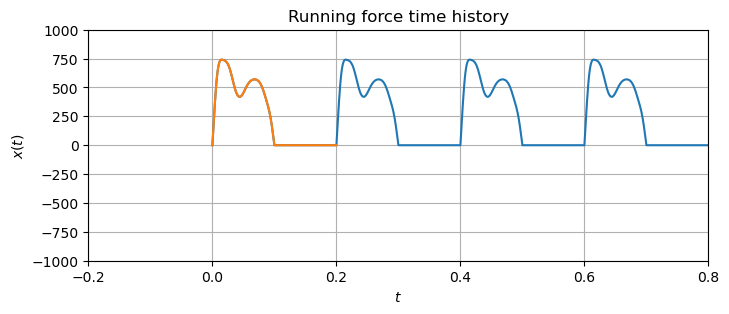

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Data for step
force_data=np.array([0.0, 95.4, 189.3, 279.8, 365.5, 444.8, 515.9, 577.3, 627.4, 666.3, 695.3, 715.9, 729.4, 737.2, 740.6, 741.1, 740.1, 738.7, 737.1, 735.0, 732.1, 728.4, 723.5, 717.2, 709.2, 699.5, 687.7, 673.5, 656.9, 638.1, 617.7, 596.1, 574.0, 551.7, 529.8, 508.9, 489.5, 472.0, 457.0, 444.5, 434.5, 427.1, 422.0, 419.4, 419.1, 421.2, 425.5, 431.7, 439.5, 448.6, 458.7, 469.4, 480.5, 491.8, 502.8, 513.3, 522.9, 531.6, 539.2, 546.0, 551.8, 556.7, 560.8, 564.1, 566.7, 568.5, 569.7, 570.2, 570.0, 569.3, 567.9, 565.7, 562.7, 558.6, 553.4, 547.1, 539.4, 530.2, 519.6, 507.3, 493.6, 478.7, 462.6, 445.7, 428.1, 410.0, 391.6, 373.0, 354.2, 334.5, 313.2, 289.9, 263.7, 234.2, 200.9, 164.6, 125.6, 84.8, 42.7, 0.0])
time_data=np.array([0.0, 0.01, 0.02, 0.02, 0.03, 0.04, 0.05, 0.06, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.11, 0.12, 0.13, 0.14, 0.15, 0.15, 0.16, 0.17, 0.18, 0.19, 0.19, 0.2, 0.21, 0.22, 0.23, 0.23, 0.24, 0.25, 0.26, 0.27, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.32, 0.33, 0.34, 0.35, 0.36, 0.36, 0.37, 0.38, 0.39, 0.4, 0.4, 0.41, 0.42, 0.43, 0.44, 0.44, 0.45, 0.46, 0.47, 0.48, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.53, 0.54, 0.55, 0.56, 0.57, 0.57, 0.58, 0.59, 0.6, 0.61, 0.61, 0.62, 0.63, 0.64, 0.65, 0.65, 0.66, 0.67, 0.68, 0.69, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.74, 0.75, 0.76, 0.77, 0.78, 0.78, 0.79, 0.8])

dt=0.01 # Time step

# Variables determining the speed
T_contact=0.1
T_air=0.1
T_step=T_contact+T_air

# Rescale contact phase to fit T_contact
t_contact = np.linspace(0, T_contact, len(time_data))

# Better: interpolate original curve onto new contact duration
x_contact = np.interp(t_contact, 
                      np.linspace(0, T_contact, len(force_data)), 
                      force_data)

# Append air phase (force = 0)
t_air = np.arange(dt, T_air + dt, dt) + T_contact
x_air = np.zeros_like(t_air)

# Combine
t = np.concatenate([t_contact, t_air])
x = np.concatenate([x_contact, x_air])

# Plot waveform
plt.figure(figsize=(8, 3))
plt.plot(np.hstack((t, t+T_step, t+T_step*2, t+T_step*3)),np.hstack((x,x,x,x))) # Plot four periods
plt.plot(t,x) # Plot one period
plt.xlim(-T_step,T_step*4)
plt.ylim(-1000, 1000)
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.title('Running force time history')
plt.grid()


## Fourier series 

Like previous examples, we will express this time history in terms of a Fourier series (sine and cosine waves):

$$ x(t) = a_{0} + \sum_{k=1}^{\infty} \left( a_k \cos\left(\frac{2\pi k}{T}t \right) + b_k \sin\left(\frac{2\pi k}{T}t \right)\right)  $$

Here $a_0$, $a_k$ and $b_k$ are Fourier coefficients given by

$$a_0 = \frac{1}{T} \int_{0}^{T}x(t) \:\text{d}t$$

$$a_k = \frac{1}{T} \int_{0}^{T}x(t)\cos\left(\frac{2\pi k}{T}t \right)\:\text{d}t$$

$$b_k = \frac{1}{T} \int_{0}^{T}x(t)\sin\left(\frac{2\pi k}{T}t \right)\:\text{d}t$$

We solve the integrals above usising the trapezoidal rule. Note that the frequencies of the sine and cosine waves are $f_1=\dfrac{1}{T}$, $f_2=\dfrac{2}{T}$, $\dots$.

a0=306.26851851851853


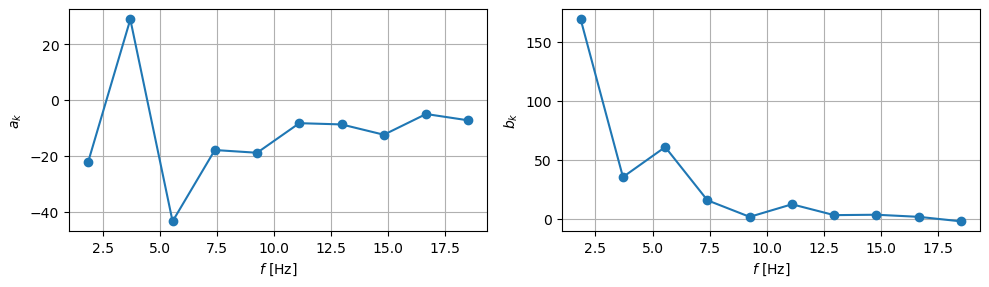

In [18]:
nterms = 10 # Number of Fourier coefficients in the sum

T = np.max(t) # The period of the waveform

a0 = 1/T*np.trapezoid(x,t) # Mean value
ak = np.zeros((nterms)) 
bk = np.zeros((nterms))

k_axis=np.arange(1,nterms+1,1) # 1,2,3...,nterms

for idx, k in np.ndenumerate(k_axis):
    ak[idx] = 1/T*np.trapezoid(x*np.cos(2.0*np.pi*k*t/T),t)
    bk[idx] = 1/T*np.trapezoid(x*np.sin(2.0*np.pi*k*t/T),t)

f_axis=k_axis/T # Corresponding frequencies in Hz for each term

# Plot Fourier coeffecients
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(f_axis,ak,marker='o')
plt.grid()
plt.xlabel('$f$ [Hz]')
plt.ylabel('$a_k$')

plt.subplot(1, 2, 2)
plt.plot(f_axis,bk,marker='o')
plt.grid()
plt.xlabel('$f$ [Hz]')
plt.ylabel('$b_k$')

plt.tight_layout()

print('a0=' + str(a0))

We see that the step force contains mainly low-frequency components (typically below 10 Hz). This is why walking and running can excite bridges, slabs, and floors with low natural frequencies.

# Verification of Fourier series approximation


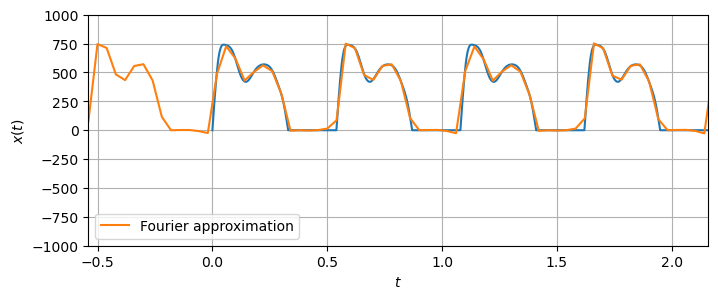

In [22]:
# Plot Fourier series approximation
tp  = np.linspace(-20,20,1000)
x_Fourier = np.ones(tp.shape[0])*a0

for idx, k in np.ndenumerate(k_axis):
    x_Fourier = x_Fourier + 2.0*(ak[idx]*np.cos(2.0*np.pi*k*tp/T) + bk[idx]*np.sin(2.0*np.pi*k*tp/T))

plt.figure(figsize=(8,3))
plt.plot(np.hstack((t, t+T_step, t+T_step*2, t+T_step*3)),np.hstack((x,x,x,x))) # Plot four periods
plt.plot(tp,x_Fourier, label='Fourier approximation')
plt.ylim(-1000, 1000)
plt.xlim(-T_step,T_step*4)
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend()
    